<a href="https://colab.research.google.com/github/LGarroyo/MIIA_estudiante_4/blob/main/Laboratorios/Lab_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

In [166]:
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
import pandas as pd
from ipywidgets import interactive
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from scipy import stats
import statsmodels.api as sm
import pylab
!pip install pingouin
from pingouin import kruskal

In [2]:
# Código
from google.colab import drive
drive.mount("/content/gdrive") ##Esto porque trabajé en google colab

df1= pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/Archivos/SB11_20182.xlsx')
df2= pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/Archivos/SB11_20192.xlsx')
  

Mounted at /content/gdrive


In [3]:
df1["ESTU_FECHANACIMIENTO"]=pd.to_datetime(df1["ESTU_FECHANACIMIENTO"], errors='coerce')

df1["EDAD"]=2018 -df1["ESTU_FECHANACIMIENTO"].dt.year ##Se crean variable edad
df2["EDAD"]=2019 -df2["ESTU_FECHANACIMIENTO"].dt.year ##Se crean variable edad
df=df1.append(df2,ignore_index = True) ##Se unen los resultados del 2018 y 2019

**ARCHIVO DE DATOS**

Para el desarrollo del siguiente estudio se emplearan los archivos de datos de las pruebas icfes aplicadas en 2018-2 y 2019-2, cuyas características se muestran a continuación:

In [192]:
print("\n El número de filas del data frame inical es ", df.shape[0])
print("\n El número de columnas del data frame inical es ", df.shape[1])
print("\n Se presenta el número de datos faltantes por variable: \n \n", df.isnull().sum())##indica el número de datos faltantes por columna



 El número de filas del data frame inical es  1096146

 El número de columnas del data frame inical es  83

 Se presenta el número de datos faltantes por variable: 
 
 ESTU_TIPODOCUMENTO              0
ESTU_NACIONALIDAD               0
ESTU_GENERO                   106
ESTU_FECHANACIMIENTO            6
PERIODO                         0
                            ...  
ESTU_INSE_INDIVIDUAL        35272
ESTU_NSE_INDIVIDUAL         35272
ESTU_ESTADOINVESTIGACION        0
ESTU_GENERACION-E               0
EDAD                            6
Length: 83, dtype: int64


In [193]:
##Contenido de los datos
print("Se presenta el tipo de variables que hay en el conjunto anterior \n \n",df.dtypes)
print("\n El conjunto de datos, contiene información personal tales como tipo de identificación, la nacionalidad, género, fecha de nacimiento, etc, \n \
      las cuales permiten caracterizar al individuo. También tiene información de contacto, tales como Depto, municipio, valor mensual de la pensión \n \
      y las veces que ha presentado el exámen. \n \n \
      El grupo de datos, también se divide en tipo de información como la socioeconómica, que brinda información como el estrato, el número de personas \n \
      con las conviven los evaluados, caracteristicas de la vivienda, nivel educativo, oficio e ingresos de sus padres, ocupación del evaluado acceso a \n \
      servicios publicos y TIC. Además, muestra información de antecendentes escolares del evaluado, la cual  brinda datos como los cantidad de años que \n \
      cursó primaria, secundaria y si reprobó alguno de ellos, si ha tenido que suspender sus estudios, así como sus intereses académicos a futuro. \n \n \
      Adicionalmente, se cuenta con una sección de expetativas que contiene infomación de los puntajes esperados por el evaluado en cada una de las \n \
      y sus expectativas profesionales/salariales. Se cuenta tambien con información del colegio, citación del examén y resultados obtenidos por el evaluado. \n \
      Esta última, muestra datos asociados a los puntajes obtenidos en cada una de las áreas del conocimiento, así como el puntaje global que para el  \n \
      contexto será la variable dependiente de interés, pues resume los resultados de todas la áreas y se supone que puede ser explicada por variables independientes \n \
      las cuales se mostrarán más adelante en este informe.")

variables=["PUNT_GLOBAL","ESTU_GENERO", "ESTU_ETNIA","ESTU_DEPTO_RESIDE","FAMI_ESTRATOVIVIENDA","FAMI_PERSONASHOGAR","FAMI_EDUCACIONPADRE",
           "FAMI_EDUCACIONMADRE","FAMI_TRABAJOLABORPADRE","FAMI_TRABAJOLABORMADRE","FAMI_TIENEINTERNET","ESTU_DEDICACIONLECTURADIARIA","ESTU_DEDICACIONINTERNET",
           "ESTU_HORASSEMANATRABAJA","ESTU_TIPOREMUNERACION","COLE_GENERO","COLE_NATURALEZA","COLE_CARACTER","COLE_AREA_UBICACION","COLE_JORNADA",
           "PERCENTIL_GLOBAL", "EDAD"]
print("\n El sub-conjunto de variables a seleccionar es ", variables)           
pos=[ i for i in range(len(df.columns.values)) if df.columns.values[i] in  variables]
data=df.iloc[:,pos]###Se selecciona el conjunto de variables en el data frame
data

Se presenta el tipo de variables que hay en el conjunto anterior 
 
 ESTU_TIPODOCUMENTO                  object
ESTU_NACIONALIDAD                   object
ESTU_GENERO                         object
ESTU_FECHANACIMIENTO        datetime64[ns]
PERIODO                              int64
                                 ...      
ESTU_INSE_INDIVIDUAL               float64
ESTU_NSE_INDIVIDUAL                 object
ESTU_ESTADOINVESTIGACION            object
ESTU_GENERACION-E                   object
EDAD                               float64
Length: 83, dtype: object

 El conjunto de datos, contiene información personal tales como tipo de identificación, la nacionalidad, género, fecha de nacimiento, etc, 
       las cuales permiten caracterizar al individuo. También tiene información de contacto, tales como Depto, municipio, valor mensual de la pensión 
       y las veces que ha presentado el exámen. 
 
       El grupo de datos, también se divide en tipo de información como la socioeconómica

ESTU_GENERO ESTU_ETNIA  ... PERCENTIL_GLOBAL  EDAD
0                 M        NaN  ...              6.0  19.0
1                 M        NaN  ...             16.0  18.0
2                 F        NaN  ...              7.0  20.0
3                 F        NaN  ...             54.0  16.0
4                 F        NaN  ...             18.0  18.0
...             ...        ...  ...              ...   ...
1096141           F        NaN  ...             97.0  17.0
1096142           M        NaN  ...             56.0  19.0
1096143           M        NaN  ...             74.0  17.0
1096144           M        NaN  ...             99.0  20.0
1096145           M        NaN  ...             73.0  17.0

[1096146 rows x 22 columns]

In [191]:
print("Se presenta el número de datos faltantes por variable: \n \n",data.isnull().sum())##indica el número de datos faltantes por columna
print("\n Con respecto a los datos faltantes la variable es ESTU_ETNIA es la que más tiene, sin embargo, estos se deben a que los evaluados indicaron \n \
      no pertenecer a una en la variable ESTU_TIENEETNIA del data frame df, por ende, estos serán reemplazados por la categoria 'Ninguna'. \n \
      Por el contrario, para los valores faltantes del resto de variables, no es posible establecer una razón lógica de su presencia, por ello se intuye que \n \
      es una real falta de información. Entonces, para los anteriores se tienen dos alternativas: impuntarlos o eliminarlos. Teniendo en cuenta la gran cantidad \n \
      de datos con la que se cuenta, se toma la elección de eliminarlos.")
print("\n Se presenta el tipo de variables que hay en el conjunto anterior \n",data.dtypes)

Se presenta el número de datos faltantes por variable: 
 
 ESTU_GENERO                     0
ESTU_ETNIA                      0
ESTU_DEPTO_RESIDE               0
FAMI_ESTRATOVIVIENDA            0
FAMI_PERSONASHOGAR              0
FAMI_EDUCACIONPADRE             0
FAMI_EDUCACIONMADRE             0
FAMI_TRABAJOLABORPADRE          0
FAMI_TRABAJOLABORMADRE          0
FAMI_TIENEINTERNET              0
ESTU_DEDICACIONLECTURADIARIA    0
ESTU_DEDICACIONINTERNET         0
ESTU_HORASSEMANATRABAJA         0
ESTU_TIPOREMUNERACION           0
COLE_GENERO                     0
COLE_NATURALEZA                 0
COLE_CARACTER                   0
COLE_AREA_UBICACION             0
COLE_JORNADA                    0
PUNT_GLOBAL                     0
PERCENTIL_GLOBAL                0
EDAD                            0
PERCENTIL_ALTO                  0
dtype: int64

 Con respecto a los datos faltantes la variable es ESTU_ETNIA es la que más tiene, sin embargo, estos se deben a que los evaluados indicaron 
   

In [7]:
data["ESTU_ETNIA"]=data["ESTU_ETNIA"].fillna("NO")
data=data.dropna()##data frame final consolidado
data.isnull().sum()##contar NA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ESTU_GENERO                     0
ESTU_ETNIA                      0
ESTU_DEPTO_RESIDE               0
FAMI_ESTRATOVIVIENDA            0
FAMI_PERSONASHOGAR              0
FAMI_EDUCACIONPADRE             0
FAMI_EDUCACIONMADRE             0
FAMI_TRABAJOLABORPADRE          0
FAMI_TRABAJOLABORMADRE          0
FAMI_TIENEINTERNET              0
ESTU_DEDICACIONLECTURADIARIA    0
ESTU_DEDICACIONINTERNET         0
ESTU_HORASSEMANATRABAJA         0
ESTU_TIPOREMUNERACION           0
COLE_GENERO                     0
COLE_NATURALEZA                 0
COLE_CARACTER                   0
COLE_AREA_UBICACION             0
COLE_JORNADA                    0
PUNT_GLOBAL                     0
PERCENTIL_GLOBAL                0
EDAD                            0
dtype: int64

# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

         PUNT_GLOBAL  PERCENTIL_GLOBAL           EDAD
count  954052.000000     954052.000000  954052.000000
mean      251.353111         51.633683      17.850828
std        50.409418         28.707049       5.156288
min         0.000000          1.000000       0.000000
25%       213.000000         27.000000      17.000000
50%       248.000000         52.000000      17.000000
75%       287.000000         77.000000      18.000000
max       478.000000        100.000000     119.000000


            PUNT_GLOBAL                               ...  EDAD                   
                  count        mean        std   min  ...   25%   50%   75%    max
ESTU_GENERO                                           ...                         
F              518470.0  247.568679  49.060448   0.0  ...  17.0  17.0  18.0  119.0
M              435582.0  255.857692  51.609035  75.0  ...  17.0  17.0  18.0  119.0

[2 rows x 24 columns]
                              PUNT_GLOBAL              ...  EDAD       
                                    count        mean  ...   75%    max
ESTU_ETNIA                                             ...             
Arhuaco                             167.0  230.299401  ...  19.0   28.0
Cancuamo                            268.0  237.854478  ...  18.0  119.0
Comunidad afrodescendiente        31602.0  216.200272  ...  18.0  119.0
Comunidades Rom (Gitanas)            17.0  245.588235  ...  19.0   21.0
Cubeo                               175.0  206.445714  ...

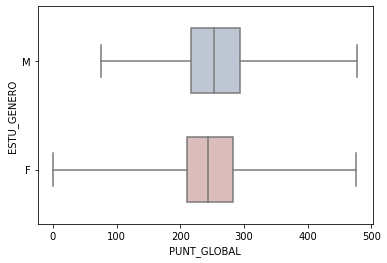

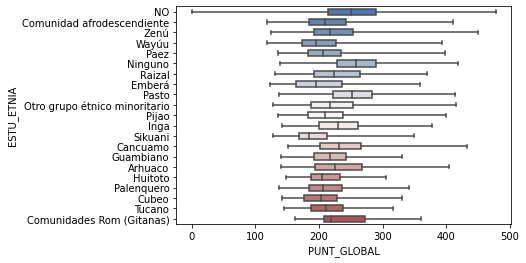

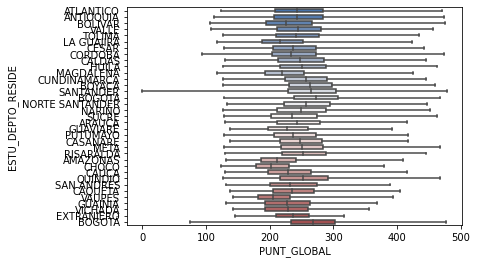

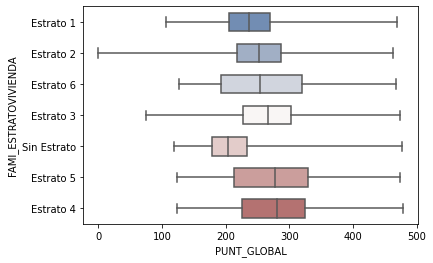

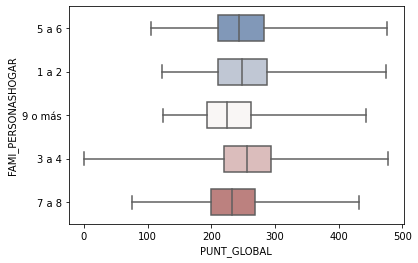

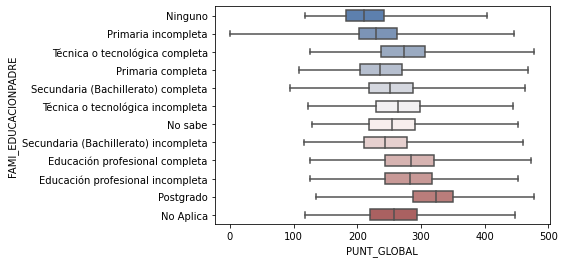

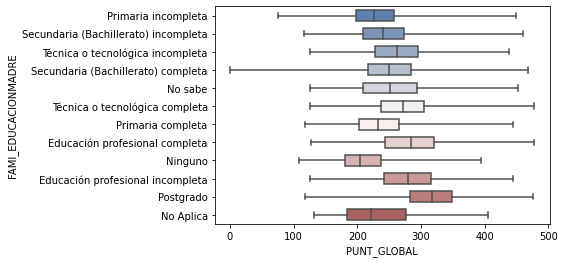

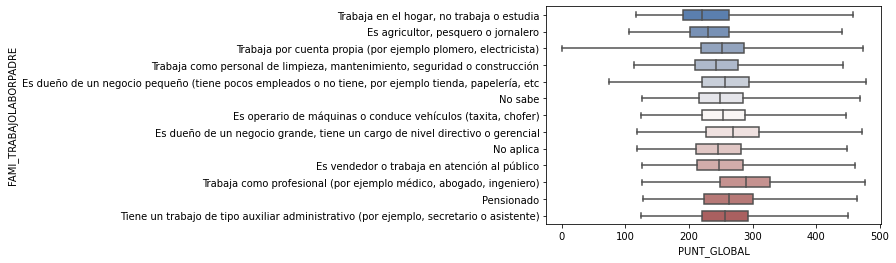

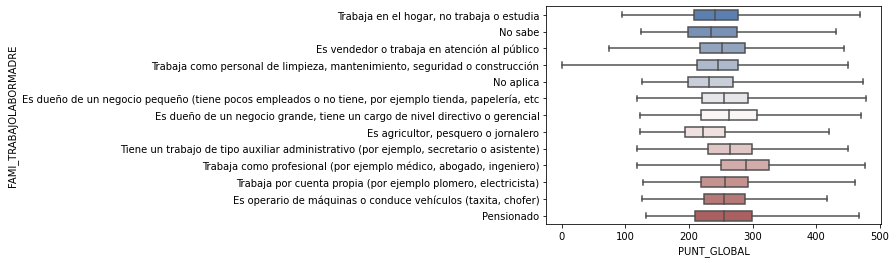

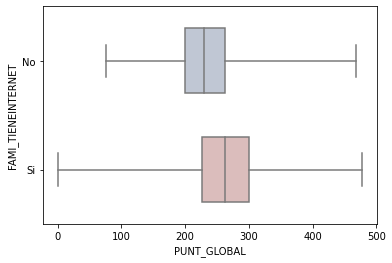

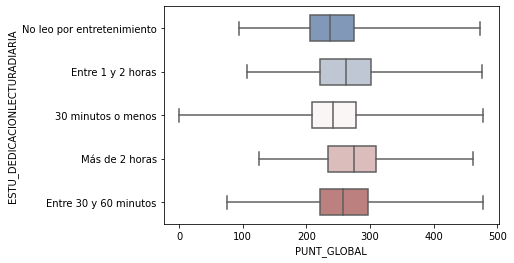

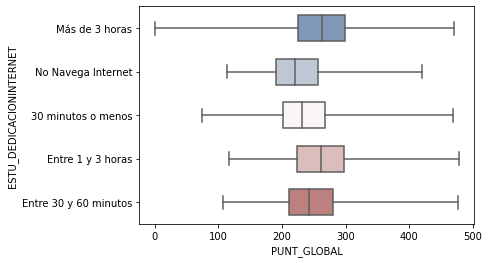

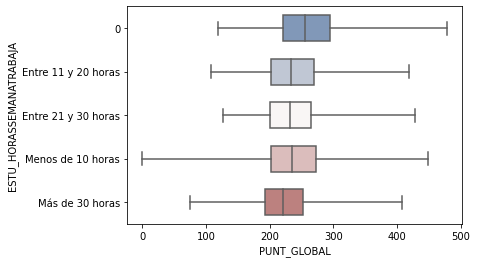

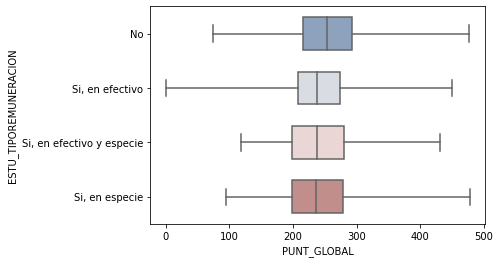

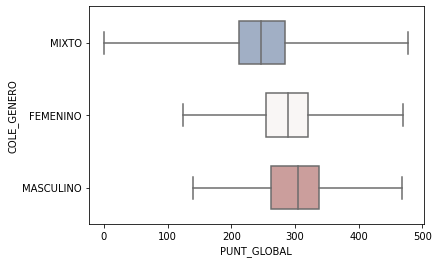

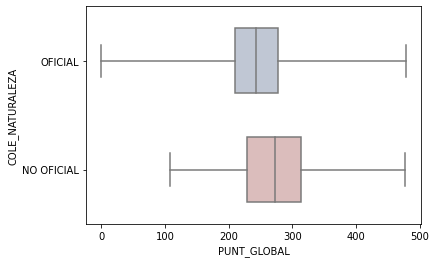

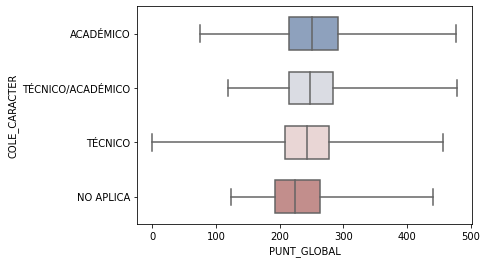

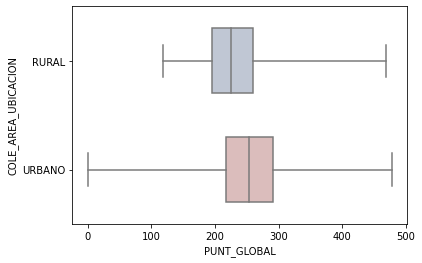

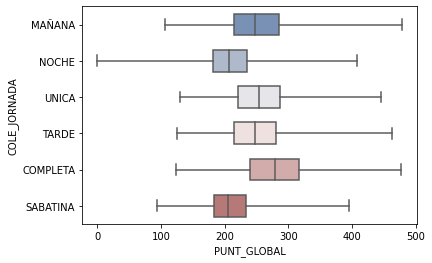

<Figure size 432x288 with 0 Axes>

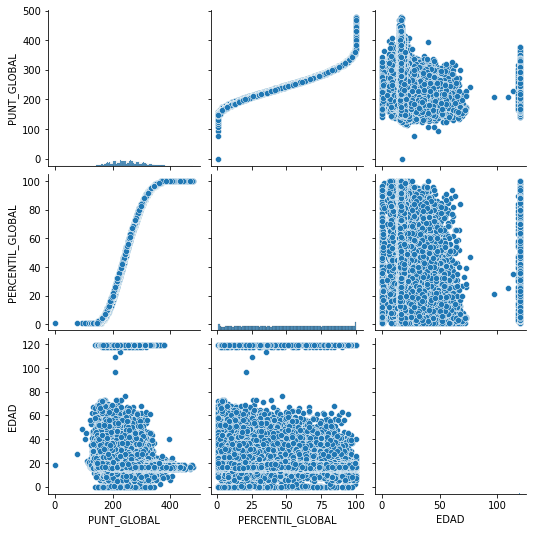

In [9]:
# Código
print(data.describe())
fig = go.Figure(data=[go.Histogram(x=data['PUNT_GLOBAL'],nbinsx=100 )],layout = go.Layout(xaxis_title = "Puntaje Global",          # Definimos el título del eje x.
                                    yaxis_title = "Frecuencia",  
                                    title = "Histograma del puntaje global",  # Definimos el título del gráfico.
                                    plot_bgcolor = "white",   # Modificamos el fondo del área del gráfico. Código HEX.
                                  )) 
fig.show() 

##Descriptivas de PUNT_GLOBAL PERCENTIL_GLOBAL  EDAD por cada variable categorica
for i in data.columns.values[:-3]:
  grouped_data = data.groupby(i)
  print(grouped_data.describe())
for i in data.columns.values[:-3]:
  plt.figure()
  sns.boxplot(x="PUNT_GLOBAL", y=i, data=data, whis=[0, 100], width=.6, palette="vlag")
  plt.show()
#####
plt.figure()
sns.pairplot(data=data)
plt.show()

El análisis gráfico evidencia que puede haber alguna diferencia en los valores obtenidos en la variable dependiente puntaje global(PUNT_GLOBAL) con respecto 
       a cada uno de los niveles de las variables categoricas relacionadas anteriormente. Ahora bien, lo ideal es probar estas diferencias con test de hipótesis 
       formales, sin embargo, por el número de datos que se tienen en este estudio, todas las purebas que se hagan van a rechazar la hipótesis nula. Por ello, 
       como alternativa se propone tomar un tamaño de muestra más pequeño n=500 totalmente aleatorio, y hacer los contrastes correspondientes. Lo primero que se prueba 
       es la normalidad de la variable PUNT_GLOBAL, pues de esto depende la metodología para probar la diferencia en los niveles con respecto a las variables categoricas  



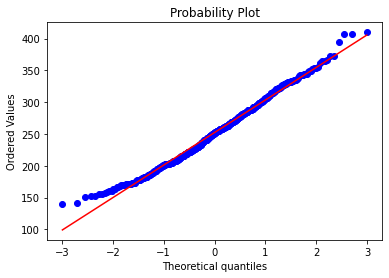

AndersonResult(statistic=1.0742505851645774, critical_values=array([0.571, 0.651, 0.781, 0.911, 1.083]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

 Teniendo en cuenta los resultados anteriores, se rechaza la hipótesis que plantea la normalidad de la variable PUNT_GLOBAL. Por ello, para analizar si hay diferencias
       entre los puntajes obtenidos en los niveles de las diferentes variables categoricas no es viable hacer un ANOVA, sino una prueba Kruskal Wallis (ANOVA no paramétrica) 
       cuyos resultados se muestran a continuación: 

              Source  ddof1          H         p-unc
Kruskal  ESTU_GENERO      1  27.706008  1.412234e-07
             Source  ddof1          H     p-unc
Kruskal  ESTU_ETNIA      7  37.885869  0.000003
                    Source  ddof1          H     p-unc
Kruskal  ESTU_DEPTO_RESIDE     29  49.471391  0.010291
                       Source  ddof1          H         p-unc
Kruskal  FAMI_ESTRATOVIVIENDA      6  41.662223  2.143854e-07
   

In [10]:
####
print("El análisis gráfico evidencia que puede haber alguna diferencia en los valores obtenidos en la variable dependiente puntaje global(PUNT_GLOBAL) con respecto \n \
      a cada uno de los niveles de las variables categoricas relacionadas anteriormente. Ahora bien, lo ideal es probar estas diferencias con test de hipótesis \n \
      formales, sin embargo, por el número de datos que se tienen en este estudio, todas las purebas que se hagan van a rechazar la hipótesis nula. Por ello, \n \
      como alternativa se propone tomar un tamaño de muestra más pequeño n=500 totalmente aleatorio, y hacer los contrastes correspondientes. Lo primero que se prueba \n \
      es la normalidad de la variable PUNT_GLOBAL, pues de esto depende la metodología para probar la diferencia en los niveles con respecto a las variables categoricas  \n")
data1=data.sample(n=500, random_state=1)
stats.probplot(data1["PUNT_GLOBAL"], dist="norm", plot=pylab)
pylab.show()
print(stats.anderson(data1["PUNT_GLOBAL"], dist='norm'))
print("\n Teniendo en cuenta los resultados anteriores, se rechaza la hipótesis que plantea la normalidad de la variable PUNT_GLOBAL. Por ello, para analizar si hay diferencias\n \
      entre los puntajes obtenidos en los niveles de las diferentes variables categoricas no es viable hacer un ANOVA, sino una prueba Kruskal Wallis (ANOVA no paramétrica) \n \
      cuyos resultados se muestran a continuación: \n")

for i in data1.columns.values[:-3] :
  print(kruskal(data=data1, dv='PUNT_GLOBAL', between=i))

print("\n Los resultados sugieren que existen diferencias en el promedio de puntajes obtenidos en al menos dos niveles de cada una de las variables categóricas, \n \
      lo que indica que por lo menos cada una de estas tiene un efecto marginal sobre la variables PUNT_GLOBAL \n")

r, p = stats.pearsonr(data1["PUNT_GLOBAL"], data1["EDAD"])
print("Adicionalmente se tiene que la correlación entre PUNT_GLOBAL y edad es ", r,". La cual no se considera fuerte, y sugiere que la edad no aporta en la explicación \n \
      de la variablidad de PUNT_GLOBAL, al menos linealmente")

In [190]:
print("\n Teniendo en cuenta lo anterior, en el caso de la variable PUNT_GLOBAL, para modelarla se utilizarán todas las variables categoricas y se excluirá \n \
      la variable edad. También, teniendo en cuenta que el 75% de los evaluados obtiene un puntaje de 287, el cual no alcanza para entrar ni competir en una  \n \
      universidad pública de Colombia, y teniendo en cuenta que la mayoria de la población colombiana  no le alcanza para pagar una privada, es importante conocer los factores \n \
      que tienen un efecto significativo en la probabilidad de que un estudiante obtenga un puntaje que lo clasifique arriba del percentil 75. Para ello, \n \
      se incluirá en la base de datos una variable dummy que indica un 1 si PERCENTIL_GLOBAL >75 y 0 en caso contrario, para luego modelarla con las variables categoricas \n \
      previamente mencionadas \n")
data["PERCENTIL_ALTO"]=0
data["PERCENTIL_ALTO"][data["PERCENTIL_GLOBAL"]>75]=1
print("Así, se plantean las tres preguntas analíticas a responder son:\n \n \
      1. ¿Tienen un efecto significativo el conjunto total de variables categoricas relacionadas anteriormente, sobre la explicación de la varianza asociada al puntaje global \n \
        de los evaluados? \n \
      2. ¿Cuales son las variable categóricas que explican significativamente la probabilidad de que un evaluado se encuentre en el grupo de calificaciones más altas? \n \
      3. ¿Basta con que las variables sean significativas, para obtener una predicción de los resultados bastante precisa?")




 Teniendo en cuenta lo anterior, en el caso de la variable PUNT_GLOBAL, para modelarla se utilizarán todas las variables categoricas y se excluirá 
       la variable edad. También, teniendo en cuenta que el 75% de los evaluados obtiene un puntaje de 287, el cual no alcanza para entrar ni competir en una  
       universidad pública de Colombia, y teniendo en cuenta que la mayoria de la población colombiana  no le alcanza para pagar una privada, es importante conocer los factores 
       que tienen un efecto significativo en la probabilidad de que un estudiante obtenga un puntaje que lo clasifique arriba del percentil 75. Para ello, 
       se incluirá en la base de datos una variable dummy que indica un 1 si PERCENTIL_GLOBAL >75 y 0 en caso contrario, para luego modelarla con las variables categoricas 
       previamente mencionadas 

Así, se plantean las tres preguntas analíticas a responder son:
 
       1. ¿Tienen un efecto significativo el conjunto total de variables categoricas 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

**DESARROLLO**

En primera instancia, se ajustará una regresión lineal para responder la pregunta 1 plantada anteriormente, cuyos resultados se muestran a continuación. Basado en dichos resultados, se puede concluir que el modelo completo que se ajustó, logra ser significativo de acuerdo al estradístico F igual a 2644.

También, que el modelo logra explicar el 35.5% ($R_{Ajustado}^2$) de la variabilidad asosiada a al puntaje global de los individuos evaluados. Por otra parte, pertenecer a una etnia muestra tener un efecto negativo sobre el puntaje global con respecto a los que no pertenecen a una. De igual modo, se obtiene un efecto positivo sobre el puntaje global cuando alguno de los padres a estudiado un posgrado



In [165]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-4], data['PUNT_GLOBAL'],test_size = 0.3, random_state=1)
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)
x = sm.add_constant(X_train)
model = sm.OLS(y_train, x).fit() #Crea el modelo de regresión a partir del método de mínimos cuadrados ordinarios
model.summary() #Muestra las estadísticas correspondientes al modelo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     2644.
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:58:51   Log-Likelihood:            -3.4188e+06
No. Observations:              667836   AIC:                         6.838e+06
Df Residuals:                  667696   BIC:                         6.840e+06
Df Model:                         139                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================================================================================
                                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                         272.9386      3.990     68.402      0.000     265.118     280.759
ESTU_GENERO_M                                                                                                                  10.9074      0.105    103.468      0.000      10.701      11.114
ESTU_ETNIA_Cancuamo                                                                                                            -9.6895      4.704     -2.060      0.039     -18.909      -0.470
ESTU_ETNIA_Comunidad afrodescendiente                                                                                         -29.8394      3.729     -8.003      0.000     -37.147     -22.531
ESTU_ETNIA_Comunidades Rom (Gitanas)                                                                                           -6.2302     11.091     -0.562      0.574     -27.969      15.509
ESTU_ETNIA_Cubeo                                                                                                              -18.4340      5.482     -3.363      0.001     -29.178      -7.690
ESTU_ETNIA_Emberá                                                                                                             -33.3760      3.901     -8.555      0.000     -41.022     -25.730
ESTU_ETNIA_Guambiano                                                                                                          -17.8847      4.546     -3.934      0.000     -26.794      -8.975
ESTU_ETNIA_Huitoto                                                                                                            -10.7950      5.797     -1.862      0.063     -22.156       0.566
ESTU_ETNIA_Inga                                                                                                               -16.8352      4.524     -3.721      0.000     -25.702      -7.968
ESTU_ETNIA_NO                                                                                                                  -9.6754      3.718     -2.602      0.009     -16.963      -2.388
ESTU_ETNIA_Ninguno                                                                                                             -9.6058      3.786     -2.537      0.011     -17.026      -2.186
ESTU_ETNIA_Otro grupo étnico minoritario                                                                                      -19.1996      3.789     -5.067      0.000     -26.626     -11.773
ESTU_ETNIA_

Ahora bien, se evalua la precisión de la predicción empleando la métrica RMSE, las puntajes globales de prueba y la predicción, cuyos resultados se muestran a continuación. De acuerdo a los resultados, se tiene que el RMSE de la predicción asociada al modelo es 40.5, la cual es menor a la desviación estándar de los datos de prueba, por la cual se puede concluir que nuestro modelo disminuye la variabilidad asociada a nuestros datos, algo que se había visto en los datos de entrenamiento

In [173]:
X_test1= sm.add_constant(X_test)
MSE = mean_squared_error(y_test, model.predict(X_test1)) 
RMSE = math.sqrt(MSE)
print("RMSE: ", RMSE)
print("Desviación Estándar: ",np.std(y_test) )

RMSE:  40.549745701387096
Desviación Estándar:  50.47603888490228


Por otra parte, para establecer cuáles son las variable categóricas que explican significativamente la probabilidad de que un evaluado se encuentre en el grupo de calificaciones más altas, se ajustó un modelo logit que busca establecer cuales factores influyen en esta probabilidad, partiendo como referencia de la variable dummy que indica un 1 si PERCENTIL_GLOBAL >75 y 0 en caso contrario.

Teniendo en cuenta los resultados que se muestran a continuación, el modelo logit completo muestra ser significativo ya que su log-verosimilitud es mayor a la log-varosimilitud de un modelo nulo sin covariables. También, pertenecer a una etnia muestra tener un efecto negativo sobre el log del odds ratio de la probilidad de pertencer a un percentil alto, global con respecto a los que no pertenecen a una. De igual modo, se obtiene un efecto positivo sobre el log del odds ratio de la probilidad de pertencer a un percentil alto, cuando alguno de los padres a estudiado un posgrado.

In [174]:
X1_train, X1_test, y1_train, y1_test = train_test_split(data.iloc[:,:-4], data['PERCENTIL_ALTO'],test_size = 0.3, random_state=1)
#y1_train=y1_train.astype('object')
X1_train = pd.get_dummies(data=X1_train, drop_first=True)
X1_test = pd.get_dummies(data=X1_test, drop_first=True)
X1_test = sm.add_constant(X1_test, prepend=True)
X1_train  = sm.add_constant(X1_train , prepend=True)
log_reg = sm.Logit(y1_train, X1_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.455354
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         PERCENTIL_ALTO   No. Observations:               667836
Model:                          Logit   Df Residuals:                   667696
Method:                           MLE   Df Model:                          139
Date:                Wed, 01 Dec 2021   Pseudo R-squ.:                  0.2080
Time:                        00:00:03   Log-Likelihood:            -3.0410e+05
converged:                       True   LL-Null:                   -3.8395e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                                                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

En cuanto a la precisión de la predición emplenaod el modelo logit, se muestra a continuación la matriz de confusión asociada a este. Allí se observa que el modelo clasifico correctamente al 78.21% de los individuos. Sin embargo esta medida no refleja la real capacidad del modelo pese a ser considera buena. Esto se ve reforzado cuando se observa que la sensibilidad es 37%, medida muy baja y que es la capacidad de clasificar los individuos en un percentil alto cuando realmente están en un percentil alto. Así, se ve que el Accuracy del modelo está influenciado por la alta especificidad que es 92.8% y que indica la alta capacidad del modelo para clasificar individuos que no pertenecen a percentiles altos.

De acuerdo a todo los resultados econtrados en los dos modelos, se puede concluir que los modelos ajustados logran explicar significativamente la varianza de las variabbles de interés, sin embargo, esto no basta para obtener una predicción de los resultados bastante precisa

In [188]:
# Accuracy de test del modelo 
# ==============================================================================
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
predicciones = log_reg.predict(exog = X1_test)
clasificacion = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(
            y_true    = y1_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El accuracy del modelo en los datos de prueba es: {100*accuracy}%")
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y1_test.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
print("\n A continuación, se muestra la matriz de confusión: \n")
print(confusion_matrix)
print("\n Sensibilidad: ", confusion_matrix.iloc[1,1]/(confusion_matrix.iloc[1,1]+confusion_matrix.iloc[1,0]))
print("\n Especifidad: ", confusion_matrix.iloc[0,0]/(confusion_matrix.iloc[0,0]+confusion_matrix.iloc[0,1]))


El accuracy del modelo en los datos de prueba es: 78.21994577521872%

 A continuación, se muestra la matriz de confusión: 

Predicción       0      1
Real                     
0           196146  15127
1            47211  27732

 Sensibilidad:  0.37004123133581523

 Especifidad:  0.9284006948355918


# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

In [16]:
# Código
datos_demo=pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/Archivos/datos_icfes_demo.xlsx')##Se cargan los datos demo para la herramienta, pues los originales son muy pesados para subir GitHub

In [17]:
import panel as pn
pn.extension('plotly')
import plotly.express as px

In [160]:
titulo = '# Tablero de visualización puntajes icfes con respecto a variables socio-demográficas'
seleccion = pn.widgets.Select(name='Escoja variable socio demográfica', options= datos_demo.columns.values[:-4].tolist())
titulo_prueba=' Prueba de diferencias entre los puntajes promedio con respecto a la variable escogiga (Kruskal-Wallis)'
conclusión_prueba="Si el valor-p<0.05, se rechaza la hipótesis nula, por lo cuál la variable que \n \
          escogió tiene al menos una categoría donde el promedio de los puntajes se diferencia de los demás. \n \
          En caso contrario, los puntajes no se diferencian entre las categorias de esta variable, \n \
          por lo que se puede suponer que no tiene un efecto significativo marginalmente para explicar el puntaje de los individuos"

In [161]:
#@pn.depends(seleccion)
def funcion_interactiva(): 
  df = datos_demo.copy()
  fig = go.Figure(data=[go.Histogram(x=df['PUNT_GLOBAL'],nbinsx=100 )],layout = go.Layout(xaxis_title = "Puntaje Global",          # Definimos el título del eje x.
                                    yaxis_title = "Frecuencia",  
                                    title = "Histograma del puntaje global",  # Definimos el título del gráfico.
                                    plot_bgcolor = "white",   # Modificamos el fondo del área del gráfico. Código HEX.
                                  )) 
  return fig 
@pn.depends(seleccion.param.value)
def funcion_interactiva2(seleccion): 
  df = datos_demo.copy()
  #print(df[seleccion.value])
  #plt.figure()
  #sns.boxplot(x="PUNT_GLOBAL", y=seleccion, data=df, whis=[0, 100], width=.6, palette="vlag")
  fig = px.box(df, x=seleccion, y="PUNT_GLOBAL")
  return fig

@pn.depends(seleccion.param.value)
def funcion_interactiva3(seleccion): 
  df = datos_demo.copy()
  prueba=kruskal(data=data1, dv='PUNT_GLOBAL', between=seleccion)  
  return  prueba, ""

In [189]:
tablero_control = pn.Row(pn.Column(titulo, seleccion), pn.Column(funcion_interactiva2,pn.Column(titulo_prueba,funcion_interactiva3,conclusión_prueba),funcion_interactiva))
tablero_control.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='Escoja variable s..., options=['ESTU_GENERO', ...], value='ESTU_GENERO')
    [1] Column
        [0] ParamFunction(function)
        [1] Column
            [0] Markdown(str)
            [1] ParamFunction(function)
            [2] Markdown(str)
        [2] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive01464')